In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [61]:
df = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Fake news project\train_news.csv")
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


### Removing irrelavant rows i.e Unnamed and id

In [63]:
df.drop(['Unnamed: 0','id'],inplace=True,axis=1)
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [64]:
# checking null values in the dataset
df.isnull().mean()

headline      0.026827
written_by    0.094087
news          0.001875
label         0.000000
dtype: float64

### Dropping null values from the dataset

In [65]:
df = df.dropna()

In [66]:
df.shape

(18285, 4)

In [67]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [68]:
y=df['label']

In [70]:
X.shape,y.shape

((18285, 3), (18285,))

In [71]:
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


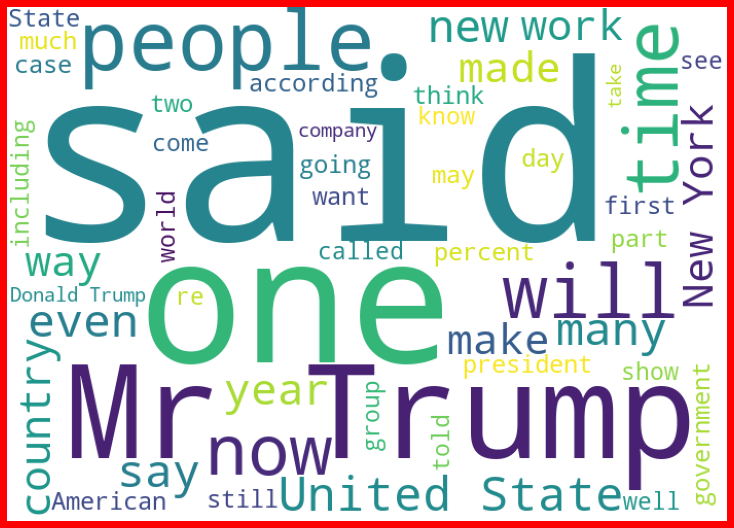

In [95]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['news'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

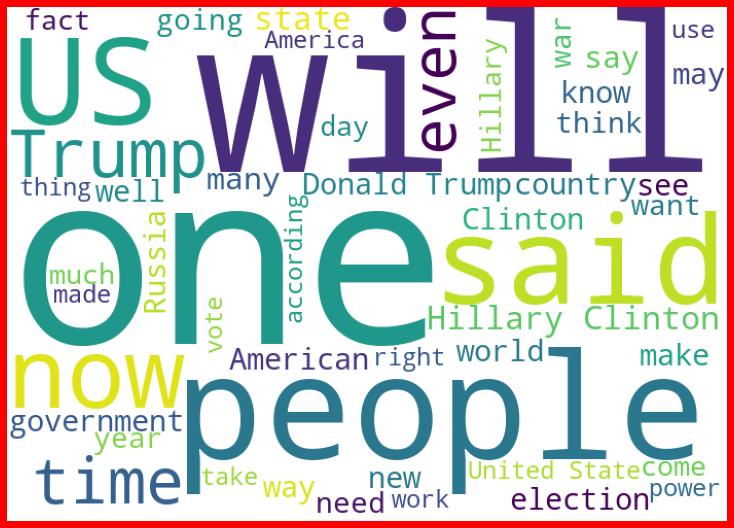

In [96]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['news'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

### Using NLP techniques tot solve the problem

#### create new variable and assign whole dataset to it

In [72]:
messages = df.copy()

In [73]:
messages.reset_index(inplace=True)

In [58]:
messages.head()

,index,headline,written_by,news,label
0,0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [59]:
messages.shape

(18285, 5)

In [16]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['news'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
 

### In above function I am doing doing text preproceessing:
    - lowercase all the news text
    - removing the stopwords
    - stemming it using porter stemmer
    - finally appending the pre proces text in new variable

In [17]:
corpus[0]

'washington sonni perdu tell georgian grow weari corrupt scandal state took governor time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end complaint file mr perdu state ethic commiss two occas rule governor violat state ethic law commiss took unusu step fine mr perdu governor numer question 

# TfidfVectorizer

In [77]:
## TFidf Vectorizer Transforms text to feature vectors that can be used as input to estimator.  
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [41]:
X.shape

(18285, 5000)

In [78]:
y=messages['label']

In [79]:
## Divide the dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [44]:
tfidf_v.get_feature_names()[:10]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc']

In [45]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [75]:
# creating new dataframe contain rows as tfidf vectors value and columns as features names
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [47]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.036893,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### function to plot confusion matrix with label

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Creation

#### MultinomialNB Algorithm

accuracy:   0.886
Confusion matrix, without normalization


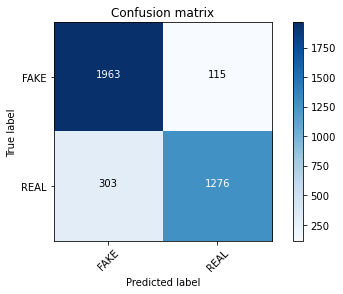

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#### Multinomial Classifier with Hyperparameter

In [80]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8917145200984413
Alpha: 0.1, Score : 0.8895269346458846
Alpha: 0.2, Score : 0.889253486464315
Alpha: 0.30000000000000004, Score : 0.8895269346458846
Alpha: 0.4, Score : 0.889253486464315
Alpha: 0.5, Score : 0.8887065901011758
Alpha: 0.6000000000000001, Score : 0.8881596937380366
Alpha: 0.7000000000000001, Score : 0.8870659010117583
Alpha: 0.8, Score : 0.8865190046486191
Alpha: 0.9, Score : 0.8862455564670495


accuracy:   0.892
Confusion matrix, without normalization


D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


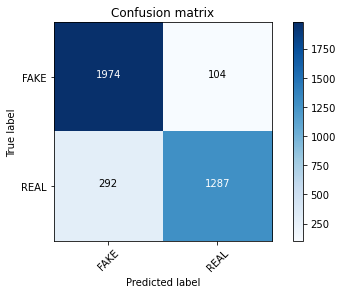

In [81]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [120]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3390
           1       0.90      0.87      0.88      2645

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



In [53]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [54]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.351211046042804, 'clinton'),
 (-5.495521837829106, 'trump'),
 (-5.653755400445625, 'hillari'),
 (-5.902761701200334, 'us'),
 (-5.929325636742641, 'elect'),
 (-6.132859026086525, 'peopl'),
 (-6.147747645835565, 'state'),
 (-6.16753319904577, 'email'),
 (-6.17666274088752, 'vote'),
 (-6.2291054004775495, 'one'),
 (-6.27266916608972, 'hillari clinton'),
 (-6.2754083543539565, 'fbi'),
 (-6.31173850373642, 'would'),
 (-6.3202629956068375, 'like'),
 (-6.36440205746794, 'time'),
 (-6.382194555315189, 'war'),
 (-6.396725524945971, 'american'),
 (-6.430338887306518, 'world'),
 (-6.450133752539658, 'year'),
 (-6.466823849987801, 'go')]

In [56]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:50]

[(-11.160873045585246, 'brief post'),
 (-11.160873045585246, 'follow pam'),
 (-11.160873045585246, 'follow pam key'),
 (-11.160873045585246, 'gorsuch'),
 (-11.160873045585246, 'judg gorsuch'),
 (-11.160873045585246, 'key twitter'),
 (-11.160873045585246, 'key twitter pamkeynen'),
 (-11.160873045585246, 'morn brief'),
 (-11.160873045585246, 'mr ail'),
 (-11.160873045585246, 'mr bannon'),
 (-11.160873045585246, 'mr castro'),
 (-11.160873045585246, 'mr christi'),
 (-11.160873045585246, 'mr cruz'),
 (-11.160873045585246, 'mr kushner'),
 (-11.160873045585246, 'mr roof'),
 (-11.160873045585246, 'mr sander'),
 (-11.160873045585246, 'mr scott'),
 (-11.160873045585246, 'mr session'),
 (-11.160873045585246, 'mr spicer'),
 (-11.160873045585246, 'mr xi'),
 (-11.160873045585246, 'ms trump'),
 (-11.160873045585246, 'pam key'),
 (-11.160873045585246, 'pam key twitter'),
 (-11.160873045585246, 'pamkeynen'),
 (-11.160873045585246, 'tillerson'),
 (-11.160873045585246, 'twitter pamkeynen'),
 (-11.1317680

In [89]:
from sklearn.metrics import roc_auc_score,roc_curve

In [91]:
pred_prob=classifier.predict_proba(X_test)[:,1]

In [92]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob)

In [93]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.02094395 0.02094395 0.02094395 0.02094395 0.02182891
 0.02182891 0.02182891 0.02241888 0.02241888 0.02241888 0.02271386
 0.02271386 0.02271386 0.02271386 0.02271386 0.02271386 0.02271386
 0.02271386 0.02271386 0.02271386 0.02271386 0.02271386 0.02300885
 0.02300885 0.02300885 0.02300885 0.02300885 0.02300885 0.02330383
 0.02330383 0.02359882 0.02359882 0.02389381 0.02389381 0.02389381
 0.02389381 0.02448378 0.02448378 0.02477876 0.02477876 0.02507375
 0.02507375 0.02536873 0.02536873 0.02566372 0.02566372 0.0259587
 0.0259587  0.02625369 0.02625369 0.02654867 0.02654867 0.02684366
 0.02684366 0.02713864 0.02713864 0.02743363 0.02743363 0.02772861
 0.02772861 0.0280236  0.0280236  0.02831858 0.02831858 0.02831858
 0.02831858 0.02861357 0.02861357 0.02920354 0.02920354 0.02979351
 0.02979351 0.03067847 0.03067847 0.03097345 0.03097345 0.03126844
 0.03126844 0.03156342 0.03156342 0.03185841 0.03185841 0.03185841
 0.03185841 0.03215339 0.03215339 0.03244838 0.03244838 0.03244

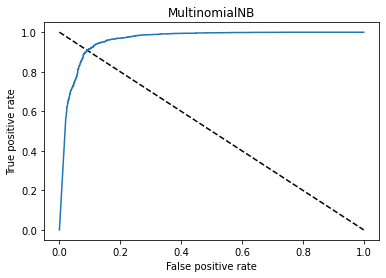

In [94]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'MultinomialNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('MultinomialNB')
plt.show()


# CountVectorizer

In [82]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [83]:
y=messages['label']

In [84]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [85]:
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8992543496271748
Alpha: 0.1, Score : 0.8977630488815245
Alpha: 0.2, Score : 0.8975973487986744
Alpha: 0.30000000000000004, Score : 0.8974316487158244
Alpha: 0.4, Score : 0.8975973487986744
Alpha: 0.5, Score : 0.8975973487986744
Alpha: 0.6000000000000001, Score : 0.8974316487158244
Alpha: 0.7000000000000001, Score : 0.8974316487158244
Alpha: 0.8, Score : 0.8975973487986744
Alpha: 0.9, Score : 0.8975973487986744


D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy:   0.899
Confusion matrix, without normalization


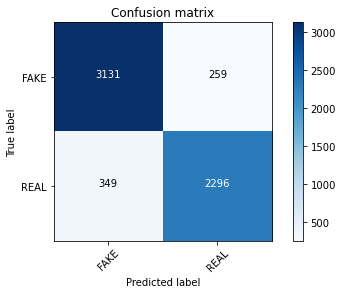

In [86]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [67]:
## Get Features names
feature_names = cv.get_feature_names()

In [68]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.078165087805559, 'clinton'),
 (-5.0845765324975645, 'trump'),
 (-5.262996073564535, 'peopl'),
 (-5.264972071045889, 'one'),
 (-5.276700076968556, 'state'),
 (-5.386001869148869, 'would'),
 (-5.421399985513412, 'us'),
 (-5.491872971659664, 'hillari'),
 (-5.510861134290742, 'like'),
 (-5.531710915713214, 'time'),
 (-5.630644665324471, 'year'),
 (-5.638024883779341, 'elect'),
 (-5.675922793860025, 'said'),
 (-5.730784991202899, 'american'),
 (-5.745994028561357, 'new'),
 (-5.811589598407549, 'also'),
 (-5.821166138782736, 'govern'),
 (-5.83175230419106, 'use'),
 (-5.834140518575243, 'presid'),
 (-5.835613028918802, 'go')]

In [69]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:50]

[(-14.540465358713984, 'brief post'),
 (-14.540465358713984, 'follow pam'),
 (-14.540465358713984, 'follow pam key'),
 (-14.540465358713984, 'gold medal'),
 (-14.540465358713984, 'gorsuch'),
 (-14.540465358713984, 'haley'),
 (-14.540465358713984, 'judg gorsuch'),
 (-14.540465358713984, 'key twitter'),
 (-14.540465358713984, 'key twitter pamkeynen'),
 (-14.540465358713984, 'matti'),
 (-14.540465358713984, 'morn brief'),
 (-14.540465358713984, 'mr ail'),
 (-14.540465358713984, 'mr bannon'),
 (-14.540465358713984, 'mr castro'),
 (-14.540465358713984, 'mr christi'),
 (-14.540465358713984, 'mr cruz'),
 (-14.540465358713984, 'mr de'),
 (-14.540465358713984, 'mr kushner'),
 (-14.540465358713984, 'mr roof'),
 (-14.540465358713984, 'mr sander'),
 (-14.540465358713984, 'mr scott'),
 (-14.540465358713984, 'mr session'),
 (-14.540465358713984, 'mr spicer'),
 (-14.540465358713984, 'mr xi'),
 (-14.540465358713984, 'ms trump'),
 (-14.540465358713984, 'pam key'),
 (-14.540465358713984, 'pam key twitte

# LSTM

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [74]:
### Vocabulary size
voc_size=5000

In [103]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

### Embedding Representation

In [76]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 299 3649 3465 ... 4653 3873 4402]
 [1319 1083   59 ...  573 1325 1325]
 [2630 2740 1333 ... 3297 3399 4162]
 ...
 [4759   77 4558 ... 1825  772  217]
 [ 731 2328 4342 ...  731 4833 3549]
 [4371 2581 3849 ... 3760 2696 2162]]


In [77]:
embedded_docs[0]

array([ 299, 3649, 3465, 2723,  615, 1237,  990,  886, 4718, 3503, 2495,
        481, 4947, 4974,  514, 2586, 1449, 4653, 3873, 4402])

In [78]:
len(embedded_docs)

18285

In [79]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
len(embedded_docs),y.shape

(18285, (18285,))

In [81]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [82]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [89]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 14628 samples, validate on 3657 samples
Epoch 1/10
14628/14628 [==============================] - 6s 381us/sample - loss: 0.4136 - accuracy: 0.7915 - val_loss: 0.3096 - val_accuracy: 0.8600
Epoch 2/10
14628/14628 [==============================] - 4s 271us/sample - loss: 0.2606 - accuracy: 0.8921 - val_loss: 0.3069 - val_accuracy: 0.8679
Epoch 3/10
14628/14628 [==============================] - 3s 238us/sample - loss: 0.2154 - accuracy: 0.9129 - val_loss: 0.3167 - val_accuracy: 0.8646
Epoch 4/10
14628/14628 [==============================] - 4s 246us/sample - loss: 0.1779 - accuracy: 0.9303 - val_loss: 0.3406 - val_accuracy: 0.8619
Epoch 5/10
14628/14628 [==============================] - 3s 238us/sample - loss: 0.1447 - accuracy: 0.9434 - val_loss: 0.3619 - val_accuracy: 0.8581
Epoch 6/10
14628/14628 [==============================] - 3s 239us/sample - loss: 0.1229 - accuracy: 0.9531 - val_loss: 0.3946 - val_accuracy: 0.8510
Epoch 7/10
14628/14628 [===========================

In [91]:
y_pred=model.predict_classes(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8394859174186492


Confusion matrix, without normalization


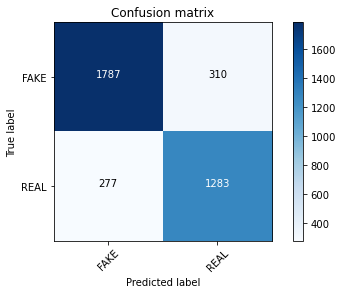

In [92]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Adding Dropout

In [102]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 40)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 14628 samples, validate on 3657 samples
Epoch 1/10
14628/14628 [==============================] - 6s 392us/sample - loss: 0.4203 - accuracy: 0.7888 - val_loss: 0.3224 - val_accuracy: 0.8526
Epoch 2/10
14628/14628 [==============================] - 3s 239us/sample - loss: 0.2623 - accuracy: 0.8893 - val_loss: 0.3113 - val_accuracy: 0.8622
Epoch 3/10
14628/14628 [==============================] - 4s 240us/sample - loss: 0.2198 - accuracy: 0.9128 - val_loss: 0.3099 - val_accuracy: 0.8630
Epoch 4/10
14628/14628 [==============================] - 4s 243us/sample - loss: 0.1850 - accuracy: 0.9273 - val_loss: 0.3235 - val_accuracy: 0.8630
Epoch 5/10
14628/14628 [==============================] - 3s 230us/sample - loss: 0.1545 - accuracy: 0.9401 - val_loss: 0.3462 - val_accuracy: 0.8562
Epoch 6/10
14628/14628 [==============================] - 4s 251us/sample - loss: 0.1292 - accuracy: 0.9523 - val_loss: 0.4275 - val_accuracy: 0.8573
Epoch 7/10
14628/14628 [===========================

### Performance Metrics And Accuracy

In [96]:
y_pred=model.predict_classes(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8471424665025977


Confusion matrix, without normalization


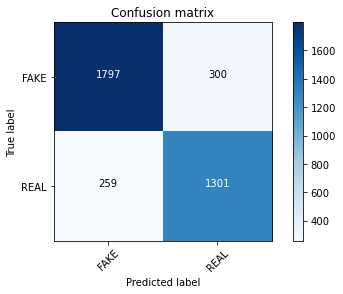

In [97]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])